In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
pd.DataFrame(boston.data,columns=boston.feature_names).head()

In [ ]:
x=boston.data
y=boston.target

In [ ]:
x.shape

In [2]:
# load data as dataframe
df = pd.read_csv('../datasets/forestfires.csv')

In [3]:
# show the first n rows
df.head(n=10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [4]:
# statistics
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
# data shape 配列の形
print('Shape: ', df.shape)

Shape:  (517, 13)


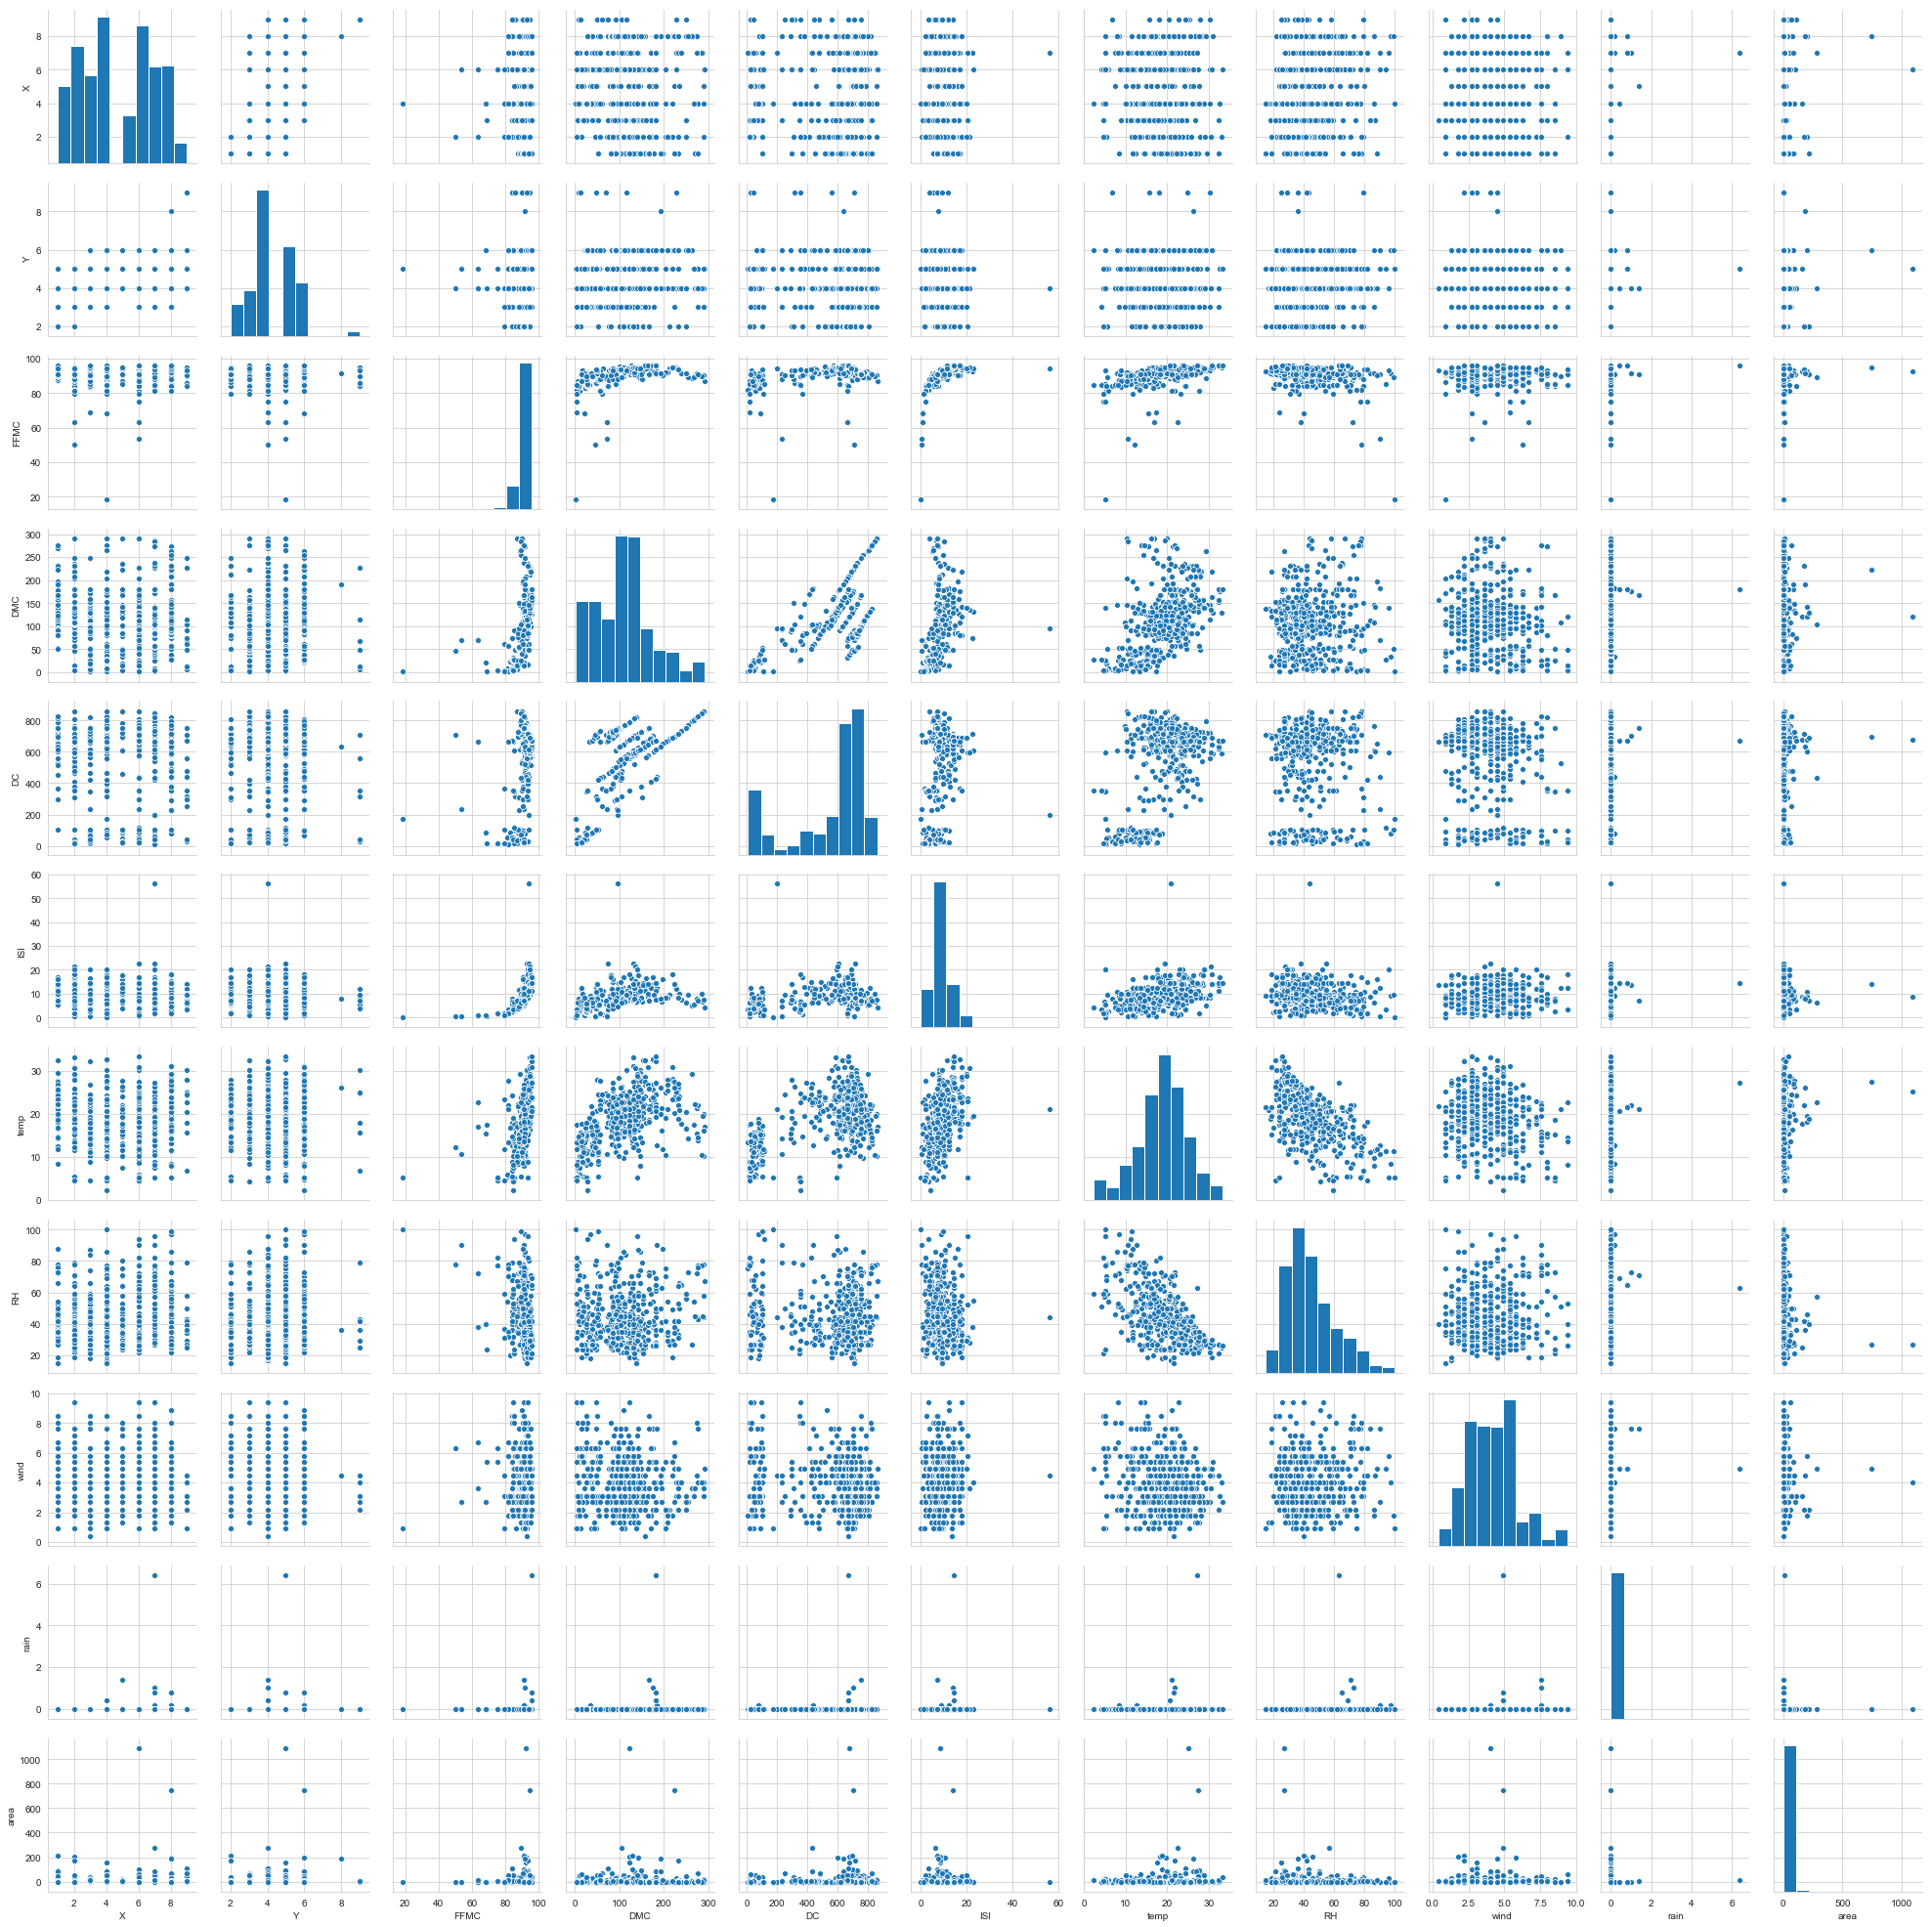

In [6]:
# plot pairwise relationships in a dataset
sns.pairplot(df);

In [108]:
# X: Hours, y: Scoures
# convert dataframe to array
X = np.array(df['DC']).reshape(-1, 1)
y = np.array(df['DMC']).reshape(-1, 1)

In [114]:

# split data with library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


# split data without library
"""
Training: 15, Testing: 10
X_train = np.array(X[:15]).reshape(-1, 1)
y_train = np.array(y[:15]).reshape(-1, 1)
X_test = np.array(X[15:]).reshape(-1, 1)
y_test = np.array(y[15:]).reshape(-1, 1)
"""

'\nTraining: 15, Testing: 10\nX_train = np.array(X[:15]).reshape(-1, 1)\ny_train = np.array(y[:15]).reshape(-1, 1)\nX_test = np.array(X[15:]).reshape(-1, 1)\ny_test = np.array(y[15:]).reshape(-1, 1)\n'

In [115]:
print(X_train.shape)
print(X_test.shape)

(206, 1)
(311, 1)


In [116]:
# set parameters
reg = LinearRegression(fit_intercept=True, normalize=True)

In [117]:
# training
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [118]:
# Result
coef = reg.coef_
intercept = reg.intercept_
score = reg.score(X_test, y_test)
print('y:wind = {} * X:rain + {}'.format(coef, intercept))
print('R^2 = {}'.format(score))

y:wind = [[0.1825789]] * X:rain + [14.04992361]
R^2 = 0.4404859347541885


In [32]:
# predict y:'Scores' using test samples
y_pred = reg.predict(X_test)

In [33]:
y_pred

array([[11.94914746],
       [11.27803535],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11.94914746],
       [11

NameError: name 'y_pred' is not defined

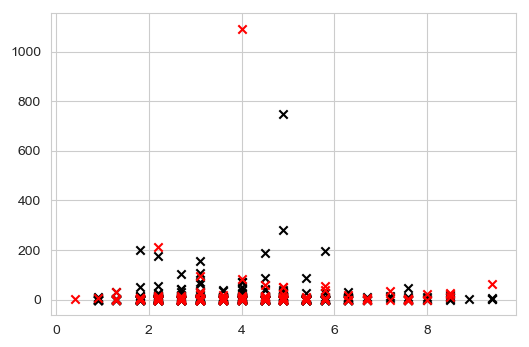

In [24]:
# Plot outputs
plt.figure(figsize=(6, 4), dpi=100)
plt.scatter(X_train, y_train, marker='x', color='black', label='Train')
plt.scatter(X_test, y_test, marker='x', color='red', label='Test')
plt.scatter(X_test, y_pred, marker='o', color='blue', label='Test')
plt.plot(X_test, y_pred, color='blue')
plt.title('Regression plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()